### Imports

In [5]:
import numpy as np
import pandas as pd
import timeit
import sys
# Add measurement mcts python package to path
sys.path.append('src/measurement_mcts')
from measurement_mcts.mcts.mcts import mcts_search, get_best_trajectory
from measurement_mcts.mcts.tree_viz import render_pyvis
from measurement_mcts.state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from measurement_mcts.environment.measurement_control_env import MeasurementControlEnvironment

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [3]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment(init_reset=False)
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


### Reset to get Random Object Configuration

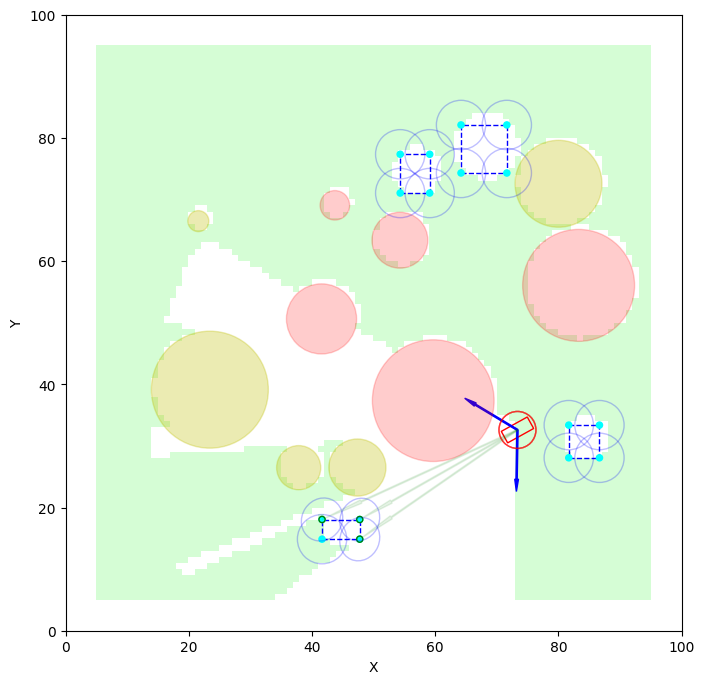

In [26]:
env.reset()
env.draw_state(env.get_state())

### Save an Object Configuration to a file

In [ ]:
env.object_manager.df.to_pickle('object_configurations/occlusion_failure1.pkl')

### Run a Single Search Search

In [31]:
state = env.get_state()
print(f'Starting car state: {state[0]}')

print('Starting MCTS search...')
start_time = timeit.default_timer()
learning_iterations = 100
best_action, root = mcts_search(env, rl, state, learning_iterations=learning_iterations,
                                    explore_factor=0.3, discount_factor=1.0)
print(f'Finished in {timeit.default_timer() - start_time} seconds')
print(f'Average time per learning iteration: {(timeit.default_timer() - start_time) / learning_iterations} seconds')
best_child = root.children[root.best_child()]
print(f'Final Q Value: {root.reward + best_child.Q}')

print('Getting best action trajectory...')
actions, states = get_best_trajectory(root, highest_Q=True)

Starting car state: [73.34700346 32.59582151  0.         -2.63565208  0.          0.        ]
Starting MCTS search...
Finished in 2.37285018500188 seconds
Average time per learning iteration: 0.023729576440018718 seconds
Final Q Value: 0.7795594024658203
Getting best action trajectory...


### Run a search for each action

In [29]:
state = env.get_state()
learning_iterations = 500
num_actions = 1
states = [state]
for i in range(num_actions):
    print(f'Action {i + 1}/{num_actions}')
    best_action, root = mcts_search(env, rl, state, learning_iterations=learning_iterations,
                                        explore_factor=0.3, discount_factor=1.0)
    state, reward, done = env.step(state, best_action)
    states.append(state)
print('Done')

Action 1/100
Action 2/100
Action 3/100
Action 4/100
Action 5/100
Action 6/100
Action 7/100
Action 8/100
Action 9/100
Action 10/100
Action 11/100
Action 12/100
Action 13/100
Action 14/100
Action 15/100
Action 16/100
Action 17/100
Action 18/100
Action 19/100
Action 20/100
Action 21/100
Action 22/100
Action 23/100
Action 24/100
Action 25/100
Action 26/100
Action 27/100
Action 28/100
Action 29/100
Action 30/100
Action 31/100
Action 32/100
Action 33/100
Action 34/100
Action 35/100
Action 36/100
Action 37/100
Action 38/100
Action 39/100
Action 40/100
Action 41/100
Action 42/100
Action 43/100
Action 44/100
Action 45/100
Action 46/100
Action 47/100
Action 48/100
Action 49/100
Action 50/100
Action 51/100
Action 52/100
Action 53/100
Action 54/100
Action 55/100
Action 56/100
Action 57/100
Action 58/100
Action 59/100
Action 60/100
Action 61/100
Action 62/100
Action 63/100
Action 64/100
Action 65/100
Action 66/100
Action 67/100
Action 68/100
Action 69/100
Action 70/100
Action 71/100
Action 72/100
A

### Plot (also open `tree_visualization.html` in browser)

Making tree visualization, this takes a while for a large tree...
Plotting starting state with search tree overlayed...
18 states in best trajectory
Creating state set visualization...


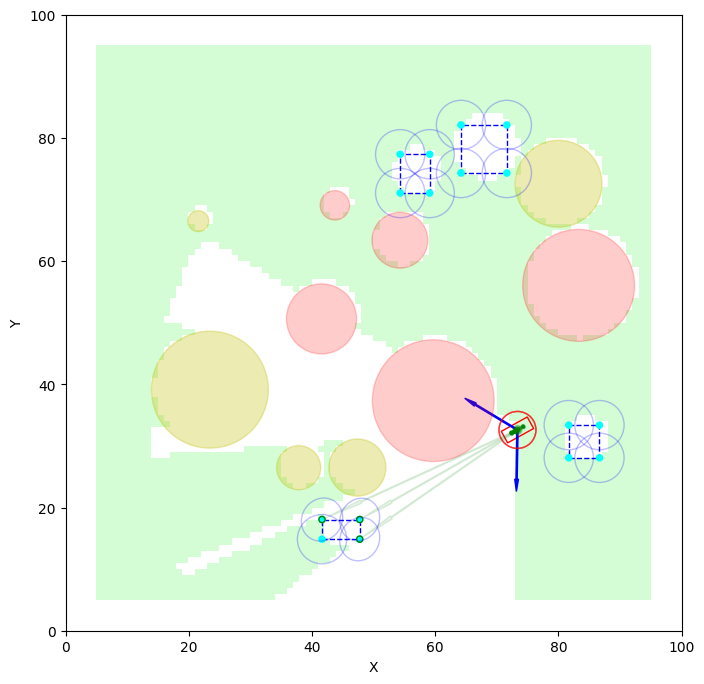

In [32]:
# Create the tree visualization html file
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.action_space, show_unsimulated=False)

# Plot the starting state with the search tree overlayed
print('Plotting starting state with search tree overlayed...')
env.draw_state(state, plot_explore_grid=True, root_node=root, scaling=4, bias=0.1, max=1., rew=True)

print(f'{len(states)} states in best trajectory')
print('Creating state set visualization...')
env.draw_state_set(states)